## DataSet
https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri

In [2]:
import cv2

img = cv2.imread("../input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(1).jpg")

img.shape

(278, 440, 3)

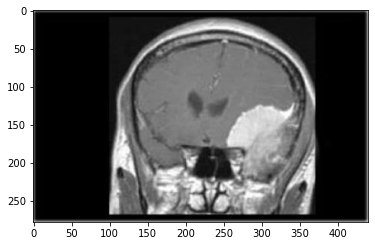

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [4]:
train_dir = "../input/brain-tumor-classification-mri/Training"
test_dir = "../input/brain-tumor-classification-mri/Testing"

In [5]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(224,224),
                                                                 label_mode = "categorical",
                                                                 batch_size = 32
                                                                 )
test_data =tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size =(224,224),
                                                               label_mode = "categorical",
                                                               batch_size = 32
                                                               )

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [6]:
for image, label in train_data:
  print(image.shape)
  print(label.shape)
  break

(32, 224, 224, 3)
(32, 4)


In [7]:
label_names = train_data.class_names

label_names, len(label_names)

(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'], 4)

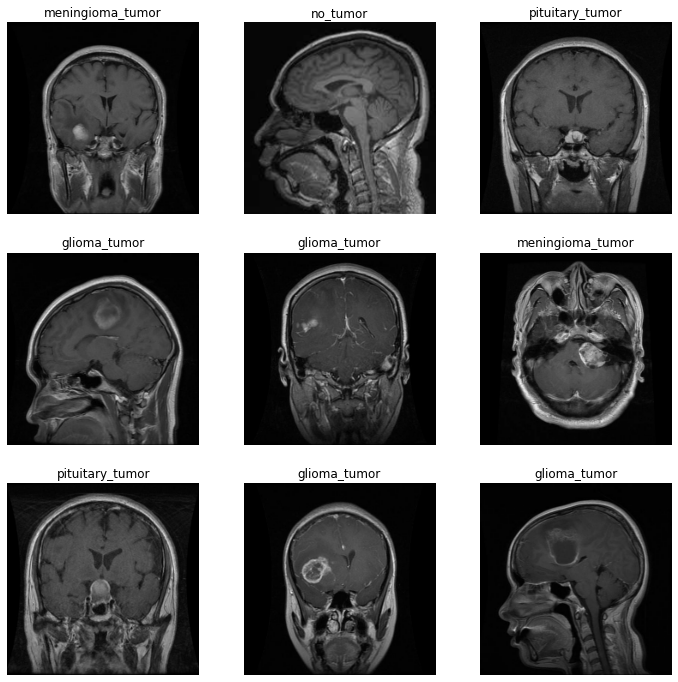

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(12,12))

for image, label in train_data.take(1):

  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(label_names[tf.argmax(label[i])])
    plt.axis("off")


In [1]:
# building a efficientnet model

import tensorflow as tf

base_model = tf.keras.applications.resnet50.ResNet50(include_top= False)
base_model.trainable = False

94781440/94765736 [==============================] - 3s 0us/step


In [9]:
# building the model
import tensorflow as tf
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(224,224,3))

x = base_model(inputs)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation= "relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation = "relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation = "relu")(x)

outputs = layers.Dense(4, activation="softmax")(x)

model = tf.keras.Model(inputs,outputs)


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

In [11]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [12]:
# fiiting data to the model

model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
)

Epoch 1/10
90/90 [==============================] - 23s 148ms/step - loss: 0.7845 - accuracy: 0.6704 - val_loss: 1.2413 - val_accuracy: 0.5939
Epoch 2/10
90/90 [==============================] - 8s 80ms/step - loss: 0.4230 - accuracy: 0.8376 - val_loss: 1.1002 - val_accuracy: 0.6701
Epoch 3/10
90/90 [==============================] - 8s 81ms/step - loss: 0.3631 - accuracy: 0.8634 - val_loss: 1.3213 - val_accuracy: 0.6523
Epoch 4/10
90/90 [==============================] - 8s 83ms/step - loss: 0.3108 - accuracy: 0.8808 - val_loss: 1.2664 - val_accuracy: 0.6929
Epoch 5/10
90/90 [==============================] - 8s 81ms/step - loss: 0.2630 - accuracy: 0.8997 - val_loss: 1.3135 - val_accuracy: 0.7056
Epoch 6/10
90/90 [==============================] - 8s 79ms/step - loss: 0.2705 - accuracy: 0.8902 - val_loss: 1.0655 - val_accuracy: 0.7310
Epoch 7/10
90/90 [==============================] - 7s 77ms/step - loss: 0.2226 - accuracy: 0.9056 - val_loss: 1.1474 - val_accuracy: 0.7665
Epoch 8/10


In [13]:
base_model_evluation = model.evaluate(test_data)

13/13 [==============================] - 1s 67ms/step - loss: 1.6632 - accuracy: 0.7310


In [14]:
print(f"Base Modle Accuracy: {base_model_evluation[1] *100:0.2f} %")

Base Modle Accuracy: 73.10 %


**Tunning the model**

In [15]:
# tunning the model
base_model.trainable = True

for layer in base_model.layers[:-1]:
  base_model.trainable = False

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)


In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

In [17]:
# fitting data to the tuned model

history=model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/10
90/90 [==============================] - 12s 97ms/step - loss: 0.1613 - accuracy: 0.9390 - val_loss: 1.5430 - val_accuracy: 0.7538
Epoch 2/10
90/90 [==============================] - 7s 80ms/step - loss: 0.1506 - accuracy: 0.9394 - val_loss: 1.6501 - val_accuracy: 0.7614
Epoch 3/10
90/90 [==============================] - 7s 79ms/step - loss: 0.1304 - accuracy: 0.9519 - val_loss: 1.7579 - val_accuracy: 0.7640
Epoch 4/10
90/90 [==============================] - 8s 80ms/step - loss: 0.1576 - accuracy: 0.9422 - val_loss: 1.1424 - val_accuracy: 0.7716
Epoch 5/10
90/90 [==============================] - 8s 86ms/step - loss: 0.1442 - accuracy: 0.9491 - val_loss: 1.9295 - val_accuracy: 0.7462
Epoch 6/10
90/90 [==============================] - 8s 79ms/step - loss: 0.1103 - accuracy: 0.9638 - val_loss: 1.5977 - val_accuracy: 0.7614
Epoch 7/10
90/90 [==============================] - 7s 79ms/step - loss: 0.1209 - accuracy: 0.9544 - val_loss: 1.5708 - val_accuracy: 0.7868
Epoch 8/10
9

In [18]:
# evaluatinn the model
model_evaluation = model.evaluate(test_data)

13/13 [==============================] - 1s 68ms/step - loss: 1.3909 - accuracy: 0.7766


In [19]:
print(f"Model Accuracy:{model_evaluation[1] *100: 0.2f} %")

Model Accuracy: 77.66 %


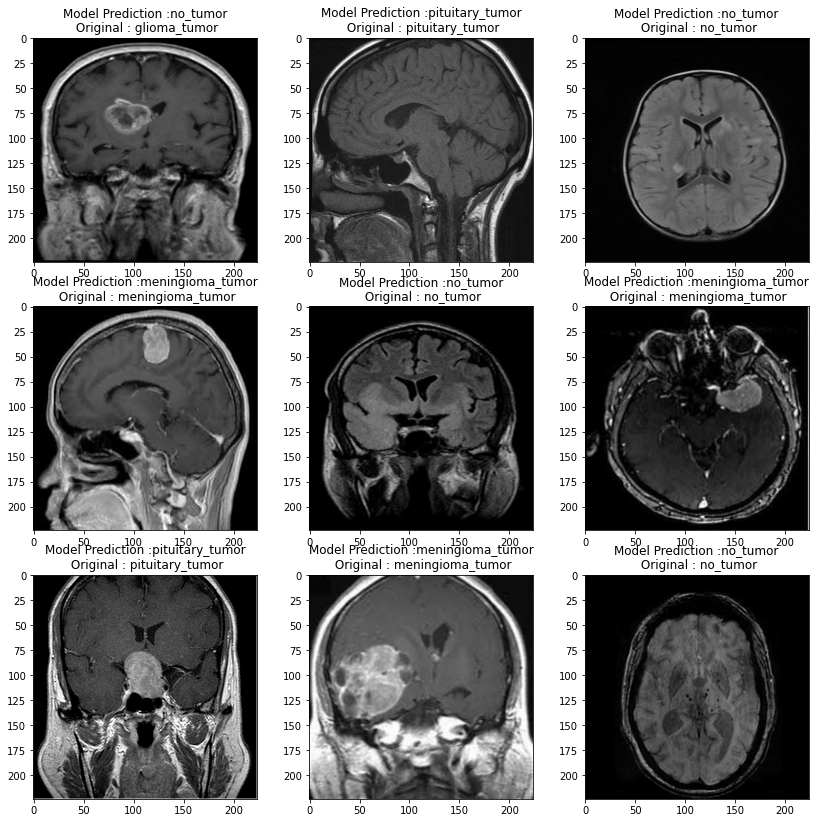

In [20]:
# predicting and visualizing the test data
import tensorflow as tf
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))

for image, label in test_data.take(1):
  model_prediction = model.predict(image)

  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))   
    plt.title(f"Model Prediction :{label_names[tf.argmax(model_prediction[i])]}\n Original : {label_names[tf.argmax(label[i])]}")


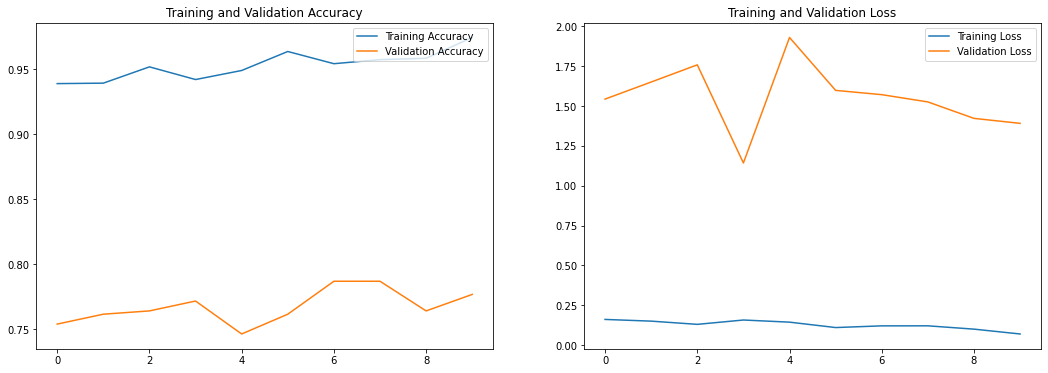

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()